<a href="https://colab.research.google.com/github/HectorRamirez85/spermClassifier/blob/main/2_SpermClassification_Curved_vs_Straight_workWithTIFFfiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries...

In [6]:
#hide
!pip install -Uqq fastbook
!pip uninstall fastai -y
!pip install fastai

Uninstalling fastai-2.4:
  Successfully uninstalled fastai-2.4
  Using cached https://files.pythonhosted.org/packages/bd/ca/bc9f4e04adcdfda1357f5c63bc67a7bf4f315883ca544726f3376b1ed068/fastai-2.4-py3-none-any.whl


Mounting on Google Drive

In [2]:
import fastbook
from fastbook import *
from fastai.vision.all import *
from skimage import io as io
from PIL import Image
from zipfile import ZipFile
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Functions...

In [3]:
def curved_straight(boolean):
  if boolean == 'False':
      return("Rectos")
  elif boolean == 'True':
    return("Curvos")

def is_curved(x): return x[0] == 'c'

Loading trained algorithm to classify the experiments...

In [5]:
# load the trainned net
learn = load_learner('/content/drive/MyDrive/Curvos_vs_Rectos/forTraining_8bits_curated/spermClassifier_18May2021.pkl') # load the trained model
print(learn)

Testing the algorithm case by case

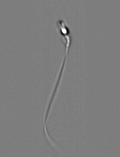

In [ ]:
path = '/content/drive/MyDrive/Curvos_vs_Rectos/43_Ch1.ome.tif'

img = io.imread(path)
img = PILImage.create(img)
img.to_thumb(192)


Sperm classifier working...

In [ ]:
is_curved,_,probs = learn.predict(img)
print(f"Is this a curved sperm?: {is_curved}.")
print(f"Probability it's a curved sperm: {probs[1].item():.6f}")

Is this a curved sperm?: False.
Probability it's a curved sperm: 0.002532


Analyzing experiments batches...

In [ ]:
filename = '/content/drive/MyDrive/Curvos_vs_Rectos/testing_tif.zip'

rows_list = []
counter=0
with ZipFile(filename) as archive:
    for entry in archive.infolist():
        with archive.open(entry) as file:
            print(archive.infolist())
            counter+=1
            img = io.imread(file, plugin='tifffile')
            img = PILImage.create(img)
            filename_jpg =  file.name.replace('testing_tif/','') # folder name
            filename = filename_jpg.replace('.tif','') 
            is_curved,_,probs = learn.predict(img) # analyze each image and calculate probabilities
            array = [filename, filename_jpg, entry.file_size, img.width, img.height, curved_straight(is_curved), probs[1].item(), probs[0].item()]
            print(str(round(counter/len(archive.infolist())*100,2))+"%"+" completed ", array)
            rows_list.append(array)
            if curved_straight(is_curved) == 'Curvos':
               img.save('/content/drive/MyDrive/Curvos_vs_Rectos/testing_Curved_vs_Straights/curved/'+ str(round(probs[1].item()*100,1)) + '%_' + filename_jpg)
            else: 
               img.save('/content/drive/MyDrive/Curvos_vs_Rectos/testing_Curved_vs_Straights/straight/'+ str(round(probs[1].item()*100,1)) + '%_' + filename_jpg)


DF = pd.DataFrame(rows_list, columns=['image name','image', 'size (bytes)', 'width (px)', 'height (px)', 'Classification', 'Prob Curved', 'Prob Straight'])
DF.to_csv('/content/drive/MyDrive/Curvos_vs_Rectos/testing_Curved_vs_Straights/test_CSV.csv')   

TiffTag 266: 0 is not a valid FILLORDER
OME series: cannot handle discontiguous storage (157, 120) != (157, 51)


[<ZipInfo filename='testing_tif/43_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=20920 compress_size=9137>, <ZipInfo filename='testing_tif/53_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=19000 compress_size=8451>, <ZipInfo filename='testing_tif/6_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=16958 compress_size=8023>]


TiffTag 266: 0 is not a valid FILLORDER
OME series: cannot handle discontiguous storage (141, 120) != (141, 51)


33.33% completed  ['43_Ch1.ome', '43_Ch1.ome.tif', 20920, 120, 157, 'Rectos', 0.0025322288274765015, 0.9974677562713623]
[<ZipInfo filename='testing_tif/43_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=20920 compress_size=9137>, <ZipInfo filename='testing_tif/53_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=19000 compress_size=8451>, <ZipInfo filename='testing_tif/6_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=16958 compress_size=8023>]


TiffTag 266: 0 is not a valid FILLORDER
OME series: cannot handle discontiguous storage (124, 120) != (124, 45)


66.67% completed  ['53_Ch1.ome', '53_Ch1.ome.tif', 19000, 120, 141, 'Curvos', 0.9999876022338867, 1.2383900866552722e-05]
[<ZipInfo filename='testing_tif/43_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=20920 compress_size=9137>, <ZipInfo filename='testing_tif/53_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=19000 compress_size=8451>, <ZipInfo filename='testing_tif/6_Ch1.ome.tif' compress_type=deflate external_attr=0x20 file_size=16958 compress_size=8023>]


100.0% completed  ['6_Ch1.ome', '6_Ch1.ome.tif', 16958, 120, 124, 'Curvos', 0.5433697700500488, 0.4566302001476288]
